In [1]:
import pandas as pd
import numpy as np

# 이제부턴 2nd_Preprocessing.csv 파일을 사용하면 됨

data = pd.read_csv(

    "./2nd_Preprocessing_0409.csv", na_values=["", "NaN"], keep_default_na=False

)

In [50]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

In [2]:
data

,ID,Sex,Age,Birth Date,Steatosis Score,NASH,Fibrosis Stage,NAFLD Type,Death,Death Date,...,FIB-4,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,LRE,LRE Date,Fibrosis
0,463012,1,78,1947-02-15,0.0,No,Low,Others,0,NaN,...,2.237928,0,1,1,0,0,1,0,NaN,0
1,543747,0,77,1947-12-22,0.0,No,Low,None,0,NaN,...,1.415996,0,0,0,0,0,0,0,NaN,0
2,556772,0,73,1952-01-14,0.0,No,Low,None,0,NaN,...,1.183062,0,0,1,0,0,0,0,NaN,0
3,1124503,1,44,1980-11-05,1.0,No,Low,Probable NASH,0,NaN,...,0.679775,0,0,0,0,0,0,0,NaN,1
4,1132625,0,61,1963-08-18,1.0,Yes,High,NASH,0,NaN,...,5.305440,0,0,0,0,0,0,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,10702453,1,29,1995-07-29,2.0,Yes,Low,NASH,0,NaN,...,1.099920,1,0,0,0,0,0,0,NaN,1
281,10758287,0,32,1992-10-14,1.0,No,Low,NAFL,0,NaN,...,0.346668,0,0,0,0,0,0,0,NaN,0
282,10830200,1,42,1982-11-15,2.0,Yes,High,NASH,0,NaN,...,0.875030,0,1,0,0,0,0,0,NaN,3
283,10837314,1,36,1988-12-27,2.0,No,Low,Probable NASH,0,NaN,...,0.638735,0,0,0,0,0,0,0,NaN,1


In [3]:
len(data)

285

In [ ]:
data['Steatosis Score'].value_counts().sort_values(ascending=False)

Steatosis Score
3.0     16
2.0     66
0.0     76
1.0    127
Name: count, dtype: int64

In [10]:
data['NAFLD Type'].value_counts()

NAFLD Type
NASH             70
NAFL             69
Others           56
Probable NASH    45
Cirrhosis        25
None             20
Name: count, dtype: int64

In [11]:
data_filtered = data[data['NAFLD Type'] != 'Others'] 

In [12]:
len(data_filtered)

229

In [13]:
data_filtered.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'Steatosis Score', 'NASH',
       'Fibrosis Stage', 'NAFLD Type', 'Death', 'Death Date', 'Weight',
       'Height', 'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U',
       'Smoking', 'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP',
       'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI',
       'SFI', 'TFI', 'SMI', 'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)',
       'VFA (Area)', 'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)',
       'SFA (Attenuation)', 'SMA (Attenuation)', 'Liver/Spleen Volume',
       'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)',
       'CT_B date', 'FS_date', 'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil',
       'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL',
       'LDL', 'TG', 'FIB-4_C', 'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosi

In [14]:
data_filtered['NAFLD Type'].value_counts()

NAFLD Type
NASH             70
NAFL             69
Probable NASH    45
Cirrhosis        25
None             20
Name: count, dtype: int64

In [18]:
mapping = {
    'None': 'None',
    'Cirrhosis': 'Cirrhosis',
    'NASH': 'MASH',
    'NAFL': 'MASLD',
    'Probable NASH': 'MASLD'
}

data_filtered.loc[:, 'MASLD Type'] = data_filtered['NAFLD Type'].map(mapping)
data_filtered['MASLD Type'].value_counts()

MASLD Type
MASLD        114
MASH          70
Cirrhosis     25
None          20
Name: count, dtype: int64

In [19]:
data_filtered

,ID,Sex,Age,Birth Date,Steatosis Score,NASH,Fibrosis Stage,NAFLD Type,Death,Death Date,...,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,LRE,LRE Date,Fibrosis,MASLD Type
1,543747,0,77,1947-12-22,0.0,No,Low,None,0,NaN,...,0,0,0,0,0,0,0,NaN,0,None
2,556772,0,73,1952-01-14,0.0,No,Low,None,0,NaN,...,0,0,1,0,0,0,0,NaN,0,None
3,1124503,1,44,1980-11-05,1.0,No,Low,Probable NASH,0,NaN,...,0,0,0,0,0,0,0,NaN,1,MASLD
4,1132625,0,61,1963-08-18,1.0,Yes,High,NASH,0,NaN,...,0,0,0,0,0,0,0,NaN,3,MASH
5,1196873,0,80,1944-09-13,1.0,No,Low,NAFL,0,NaN,...,0,0,1,0,1,0,0,NaN,0,MASLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,10702453,1,29,1995-07-29,2.0,Yes,Low,NASH,0,NaN,...,1,0,0,0,0,0,0,NaN,1,MASH
281,10758287,0,32,1992-10-14,1.0,No,Low,NAFL,0,NaN,...,0,0,0,0,0,0,0,NaN,0,MASLD
282,10830200,1,42,1982-11-15,2.0,Yes,High,NASH,0,NaN,...,0,1,0,0,0,0,0,NaN,3,MASH
283,10837314,1,36,1988-12-27,2.0,No,Low,Probable NASH,0,NaN,...,0,0,0,0,0,0,0,NaN,1,MASLD


In [21]:
data_filtered.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'Steatosis Score', 'NASH',
       'Fibrosis Stage', 'NAFLD Type', 'Death', 'Death Date', 'Weight',
       'Height', 'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U',
       'Smoking', 'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP',
       'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI',
       'SFI', 'TFI', 'SMI', 'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)',
       'VFA (Area)', 'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)',
       'SFA (Attenuation)', 'SMA (Attenuation)', 'Liver/Spleen Volume',
       'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)',
       'CT_B date', 'FS_date', 'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil',
       'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL',
       'LDL', 'TG', 'FIB-4_C', 'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosi

C:\Users\chona\AppData\Local\Temp\ipykernel_5832\2902823288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


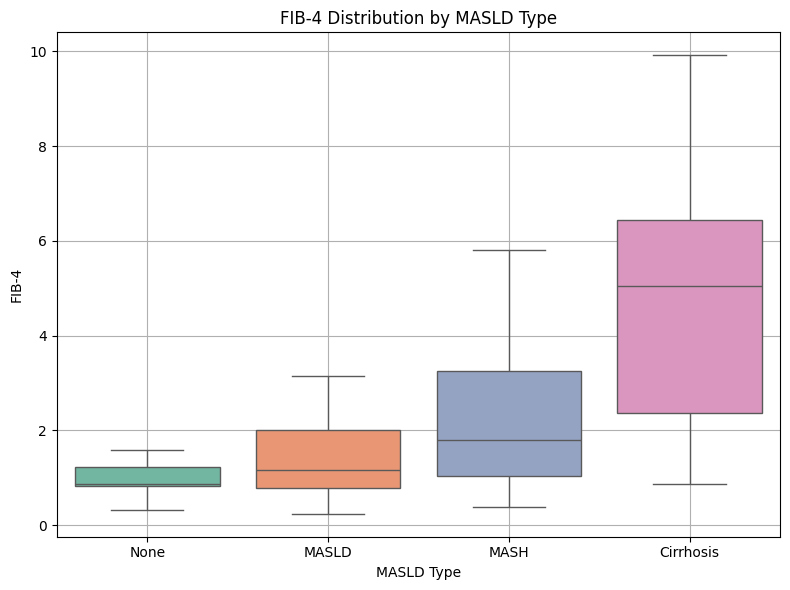

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='MASLD Type',
    y='FIB-4',
    data=data_filtered,
    palette='Set2',
    showfliers=False
)
plt.title('FIB-4 Distribution by MASLD Type')
plt.xlabel('MASLD Type')
plt.ylabel('FIB-4')
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\chona\AppData\Local\Temp\ipykernel_5832\1715608534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


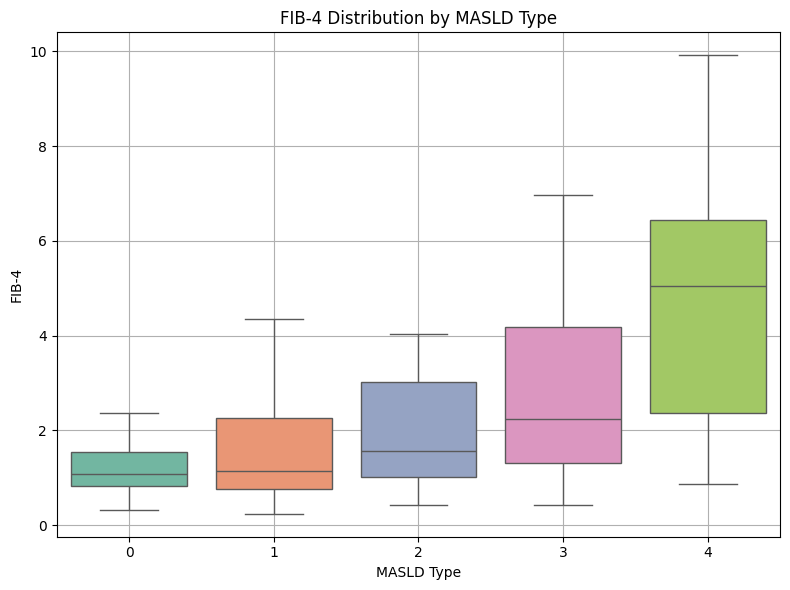

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Fibrosis',
    y='FIB-4',
    data=data_filtered,
    palette='Set2',
    showfliers=False
)
plt.title('FIB-4 Distribution by MASLD Type')
plt.xlabel('MASLD Type')
plt.ylabel('FIB-4')
plt.grid(True)
plt.tight_layout()
plt.show()



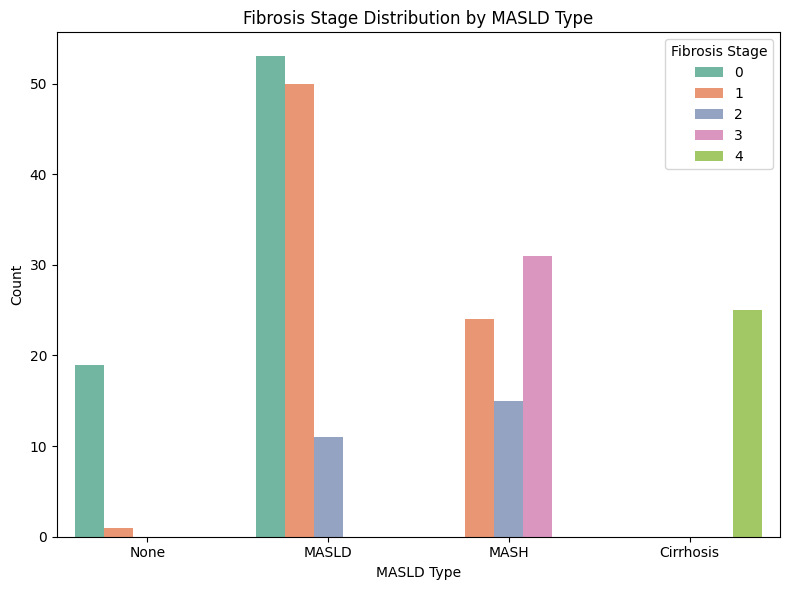

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(
    data=data_filtered,
    x='MASLD Type',
    hue='Fibrosis',
    palette='Set2'
)
plt.title('Fibrosis Stage Distribution by MASLD Type')
plt.xlabel('MASLD Type')
plt.ylabel('Count')
plt.legend(title='Fibrosis Stage')
plt.tight_layout()
plt.show()


In [33]:
data_filtered.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'Steatosis Score', 'NASH',
       'Fibrosis Stage', 'NAFLD Type', 'Death', 'Death Date', 'Weight',
       'Height', 'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U',
       'Smoking', 'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP',
       'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI',
       'SFI', 'TFI', 'SMI', 'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)',
       'VFA (Area)', 'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)',
       'SFA (Attenuation)', 'SMA (Attenuation)', 'Liver/Spleen Volume',
       'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)',
       'CT_B date', 'FS_date', 'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil',
       'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL',
       'LDL', 'TG', 'FIB-4_C', 'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosi

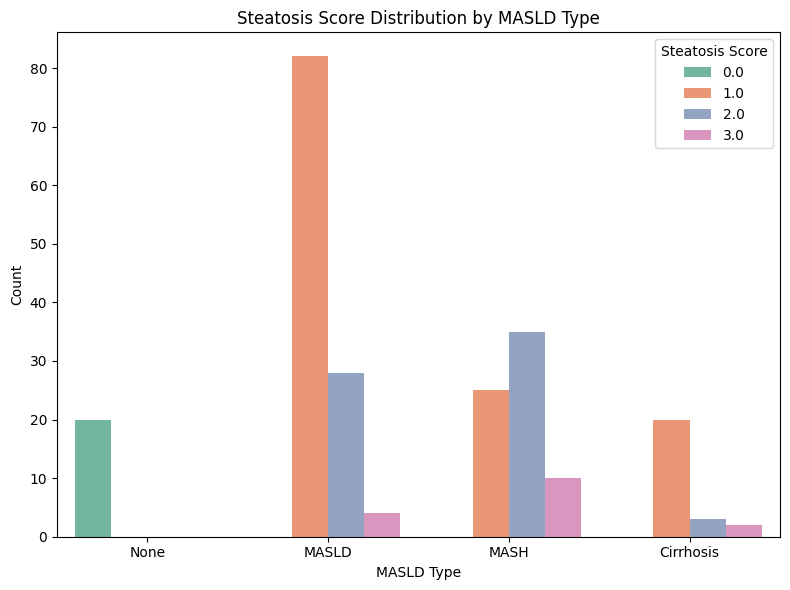

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(
    data=data_filtered,
    x='MASLD Type',
    hue='Steatosis Score',
    palette='Set2'
)
plt.title('Steatosis Score Distribution by MASLD Type')
plt.xlabel('MASLD Type')
plt.ylabel('Count')
plt.legend(title='Steatosis Score')
plt.tight_layout()
plt.show()


In [30]:
# MASLD Type이 None이고 Fibrosis가 1인 행을 출력
data_filtered[(data_filtered['MASLD Type'] == 'None') & (data_filtered['Fibrosis'] == 1)]

,ID,Sex,Age,Birth Date,Steatosis Score,NASH,Fibrosis Stage,NAFLD Type,Death,Death Date,...,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,LRE,LRE Date,Fibrosis,MASLD Type
89,4349527,1,40,1984-11-14,0.0,No,Low,None,0,NaN,...,0,0,0,0,0,0,0,NaN,1,None


In [44]:
data_filtered['BMI_C'].value_counts()

BMI_C
2    99
1    77
3    41
5     8
4     3
0     1
Name: count, dtype: int64

In [47]:
data_filtered.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'Steatosis Score', 'NASH',
       'Fibrosis Stage', 'NAFLD Type', 'Death', 'Death Date', 'Weight',
       'Height', 'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U',
       'Smoking', 'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP',
       'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI',
       'SFI', 'TFI', 'SMI', 'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)',
       'VFA (Area)', 'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)',
       'SFA (Attenuation)', 'SMA (Attenuation)', 'Liver/Spleen Volume',
       'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)',
       'CT_B date', 'FS_date', 'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil',
       'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL',
       'LDL', 'TG', 'FIB-4_C', 'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosi

In [51]:
data_filtered[data_filtered['BMI_C'] == 0]

,ID,Sex,Age,Birth Date,Steatosis Score,NASH,Fibrosis Stage,NAFLD Type,Death,Death Date,Weight,Height,Waist to Height,Waist,BMI_C,BMI,Last F/U,Smoking,Ascites,Ascites_Date,VB,VB_Date,HEP,HEP_Date,HRS,HRS_Date,LT,LT_Date,SBP,DBP,VFI,SFI,TFI,SMI,VFA (Volume),SFA (Volume),Spleen (Volume),VFA (Area),SFA (Area),SMA (Area),VFA (Attenuation),SFA (Attenuation),SMA (Attenuation),Liver/Spleen Volume,Liver/Spleen HU,Liver (HU),Spleen (HU),Liver (PDFF),CT_B date,FS_date,LSM_C,LSM,CAP,AST,ALT,T.bil,PLT,PT INR,Alb,Glucose,HbA1c,eGFR,T.chol,HDL,LDL,TG,FIB-4_C,FIB-4,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,LRE,LRE Date,Fibrosis,MASLD Type
199,8292821,1,43,1981-04-19,3.0,Yes,High,NASH,0,NaN,48.1,171.2,4.111889,703.955444,0,16.411095,2019-06-10,1.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,128.0,94.0,50.143641,73.698499,123.842139,34.463699,146.968203,216.006172,118.202781,17.422617,26.110112,101.011172,-75.80864,-80.763222,41.862881,8.974433,0.063705,2.787817,43.761215,35.907645,2017-12-14,2018-04-03,3,9.9,219.0,625.0,86.0,1.9,149.0,0.89,5.4,183.0,6.4,136.569,196.0,68.0,81.0,144.0,2,19.449703,0,0,0,0,0,0,0,NaN,3,MASH


C:\Users\chona\AppData\Local\Temp\ipykernel_5832\3474339482.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


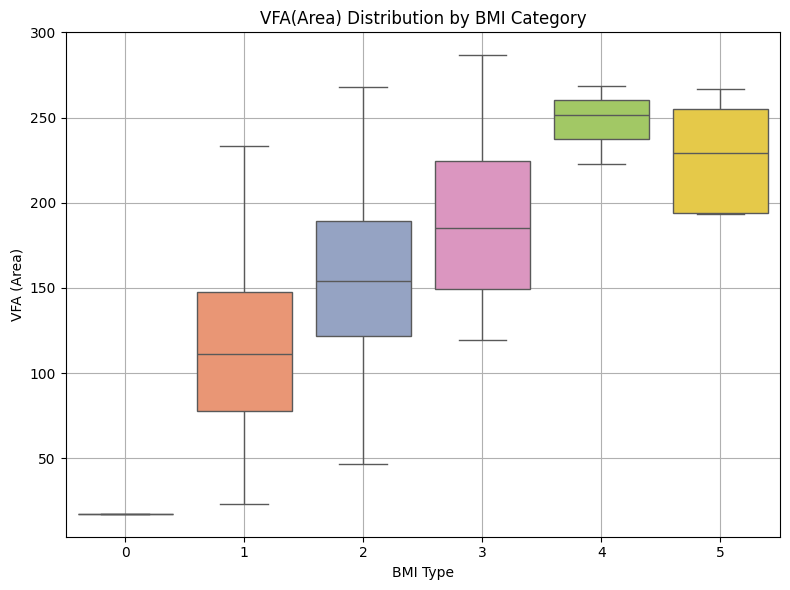

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='BMI_C',
    y='VFA (Area)',
    data=data_filtered,
    palette='Set2',
    showfliers=False
)
plt.title('VFA(Area) Distribution by BMI Category')
plt.xlabel('BMI Type')
plt.ylabel('VFA (Area)')
plt.grid(True) 
plt.tight_layout()
plt.show()



Pearson correlation: 0.55


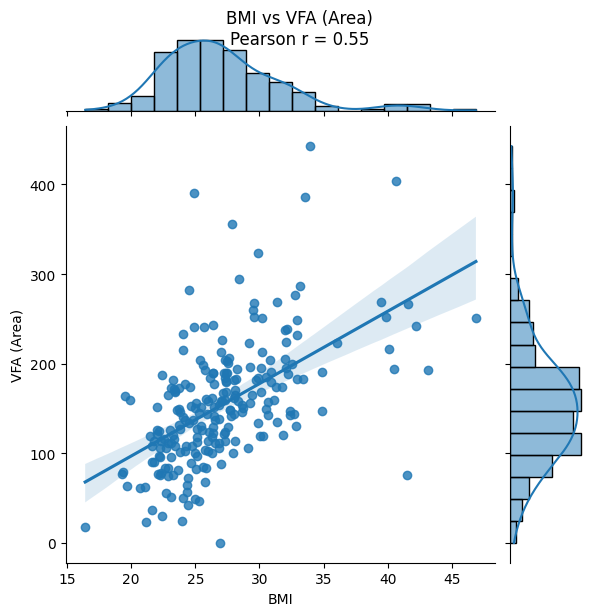

In [43]:
corr = data_filtered['BMI'].corr(data_filtered['VFA (Area)'], method='pearson')
print(f"Pearson correlation: {corr:.2f}")  # 예: 0.72

import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(
    data=data_filtered,
    x='BMI',
    y='VFA (Area)',
    kind='reg',
    height=6
).fig.suptitle(f'BMI vs VFA (Area)\nPearson r = {corr:.2f}', y=1.02)
plt.show()


# Steatosis 예측 (1) Steatosis 정의 (NAFL부터, Probable NASH 부터, NASH 부터) (2) 환자군 (Fibrosis 환자군 설정과 같은 방법)

In [38]:
# Adjusted code to ensure subgroup starts from "None" (nafld_order[1]) and includes/excludes "Others" based on a toggle


import pandas as pd

import numpy as np

from itertools import product

from sklearn.metrics import roc_auc_score

from scipy.stats import spearmanr


# Copy the original data

df = data_filtered.copy()


# Define features to evaluate

features = [
    "Sex",
    "Age",
    "Weight",
    "Height",
    "Waist to Height",
    "Waist",
    "BMI",
    "Smoking",
    "SBP",
    "DBP",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "VFA (Volume)",
    "SFA (Volume)",
    "Spleen (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    "VFA (Attenuation)",
    "SFA (Attenuation)",
    "SMA (Attenuation)",
    "Liver/Spleen Volume",
    "Liver/Spleen HU",
    "Liver (HU)",
    "Spleen (HU)",
    "Liver (PDFF)",
    "LSM",
    "CAP",
    "AST",
    "ALT",
    "T.bil",
    "PLT",
    "PT INR",
    "Alb",
    "Glucose",
    "HbA1c",
    "eGFR",
    "T.chol",
    "HDL",
    "LDL",
    "TG",
    "FIB-4",
    "BMI_C",
    "LSM_C",
    "FIB-4_C",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
    # "Spleen_Vl_Nor_BSA",
    # "Spleen_Vl_Nor_WH",
]


# Define categorical and continuous features

categorical_features = [
    "Sex",
    "BMI_C",
    "LSM_C",
    "FIB-4_C",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
]


# Continuous features

continuous_features = [col for col in features if col not in categorical_features]


# Generate all contiguous subgroup ranges starting from "None" (nafld_order[1])

# nafld_order = ["Others", "None", "NAFL", "Probable NASH", "NASH", "Cirrhosis"]

masld_order = ["None", "MASLD", "MASH", "Cirrhosis"]

subgroup_options = []


for i in range(0, len(masld_order)):  # Start from "None" (index 1)

    for j in range(i + 1, len(masld_order) + 1):

        subgroup_options.append(masld_order[i:j])

print(f'subgroup_options: {subgroup_options}')
# Option to include/exclude "Others"

# include_others_options = [False, True]  # Toggle whether "Others" is included


# Define different steatosis thresholds based on NAFLD Type

steatosis_definitions = {
    "Above None": ["MASLD", "MASH",  "Cirrhosis"],
    "Above MASLD": ["MASH",  "Cirrhosis"],
}


# Store results

steatosis_results = []


# Iterate through all combinations of subgroup, include_others, and steatosis definition

for steatosis_label, steatosis_types in steatosis_definitions.items():

    for subgroup in (subgroup_options):

        # Determine the subgroup with or without "Others"

        

        # Define target label based on steatosis threshold

        df["Steatosis"] = df["MASLD Type"].isin(steatosis_types).astype(int)

        # Filter data based on NAFLD Type

        filtered_df = df[df["MASLD Type"].isin(subgroup)]

        # Skip iteration if no data remains after filtering

        if filtered_df.empty:
            continue

        # AUC score storage for current settings

        for feature in features:

            X = filtered_df[feature]

            y = filtered_df["Steatosis"]

            # Convert X to a Pandas Series before checking unique values

            X = pd.Series(X)

            y = pd.Series(y)

            # Skip if X has only one unique value (cannot compute AUC)

            if (y.nunique() < 2) or (X.nunique() < 2):
                continue

            # Compute AUC score

            auc = roc_auc_score(y, X)

            # Compute Spearman correlation

            spearman_corr, _ = spearmanr(X, y)

            # Adjust AUC if necessary

            if auc < 0.5:

                auc = 1 - auc

            # Store results

            steatosis_results.append(
                {
                    "Feature": feature,
                    "AUC": auc,
                    "Steatosis Definition": steatosis_label,
                    "Subgroup Range": ", ".join(subgroup),
                    "Spearman Corr": spearman_corr,
                }
            )


# Convert results to DataFrame

steatosis_results_df = pd.DataFrame(steatosis_results)


# Pivot table to organize AUC & Spearman correlation results

aggregated_steatosis_results = steatosis_results_df.pivot_table(
    index=["Feature", "Subgroup Range"],
    columns="Steatosis Definition",
    values=["AUC", "Spearman Corr"],
).reset_index()


# Flatten MultiIndex columns

aggregated_steatosis_results.columns = [
    " ".join(col).strip() if isinstance(col, tuple) else col
    for col in aggregated_steatosis_results.columns
]

print(aggregated_steatosis_results.columns)

# Ensure correct column order explicitly
column_order = [
    "Feature",
    "Subgroup Range",
    "AUC Above None",
    "AUC Above MASLD",
    "Spearman Corr Above None",
    "Spearman Corr Above MASLD",
]

aggregated_steatosis_results = aggregated_steatosis_results[column_order]


# Rename columns for clarity

# aggregated_steatosis_results = aggregated_steatosis_results.rename(
#     columns={
#         "AUC Above None": "AUC (Steatosis Above None)",
#         "AUC Above NAFL": "AUC (Steatosis Above NAFL)",
#         "AUC Above Probable NASH": "AUC (Steatosis Above Probable NASH)",
#         "Spearman Corr Above None": "Spearman Corr (Steatosis Above None)",
#         "Spearman Corr Above NAFL": "Spearman Corr (Steatosis Above NAFL)",
#         "Spearman Corr Above Probable NASH": "Spearman Corr (Steatosis Above Probable NASH)",
#     }
# )


# Add a new column for sorting based on the max AUC value across all Steatosis definitions

aggregated_steatosis_results["Max AUC"] = aggregated_steatosis_results[
    [
        "AUC Above None",
        "AUC Above MASLD",
    ]
].max(axis=1)


# Sort by max AUC in descending order

aggregated_steatosis_results = aggregated_steatosis_results.sort_values(
    by="Max AUC", ascending=False
)

subgroup_options: [['None'], ['None', 'MASLD'], ['None', 'MASLD', 'MASH'], ['None', 'MASLD', 'MASH', 'Cirrhosis'], ['MASLD'], ['MASLD', 'MASH'], ['MASLD', 'MASH', 'Cirrhosis'], ['MASH'], ['MASH', 'Cirrhosis'], ['Cirrhosis']]
Index(['Feature', 'Subgroup Range', 'AUC Above MASLD', 'AUC Above None',
       'Spearman Corr Above MASLD', 'Spearman Corr Above None'],
      dtype='object')


In [40]:
aggregated_steatosis_results.to_csv(
    "250409_steatosis_type.csv", index=False, encoding="utf-8-sig"
)

In [ ]:
aggregated_steatosis_results.to_csv(
    "aggregated_steatosis_results.csv", index=False, encoding="utf-8-sig"
)

In [41]:
data_filtered.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'Steatosis Score', 'NASH',
       'Fibrosis Stage', 'NAFLD Type', 'Death', 'Death Date', 'Weight',
       'Height', 'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U',
       'Smoking', 'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP',
       'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI',
       'SFI', 'TFI', 'SMI', 'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)',
       'VFA (Area)', 'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)',
       'SFA (Attenuation)', 'SMA (Attenuation)', 'Liver/Spleen Volume',
       'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)',
       'CT_B date', 'FS_date', 'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil',
       'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL',
       'LDL', 'TG', 'FIB-4_C', 'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosi